###**CODSOFT**

**Name: Keerthana N D**


**Batch: Sept Batch A6**


**Role: Data Science**


###**TASK 4 : SALES PREDICTION USING PYTHON**

###*Importing Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,recall_score,f1_score,precision_score

###*Loading Dataset*

In [2]:
#Read the csv file
sales = pd.read_csv('/content/sales.csv')

In [3]:
#print
sales

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


###*Data Preprocessing*

In [4]:
#print first 5 rows
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
#print last 5 rows
sales.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
#describes the statistical measure of each numeric column
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
#summary of dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
#determine the dimension of df
sales.shape

(200, 4)

In [9]:
#datatypes of the column
sales.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [10]:
#missing null values
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

###*Exploratory Data Analysis*

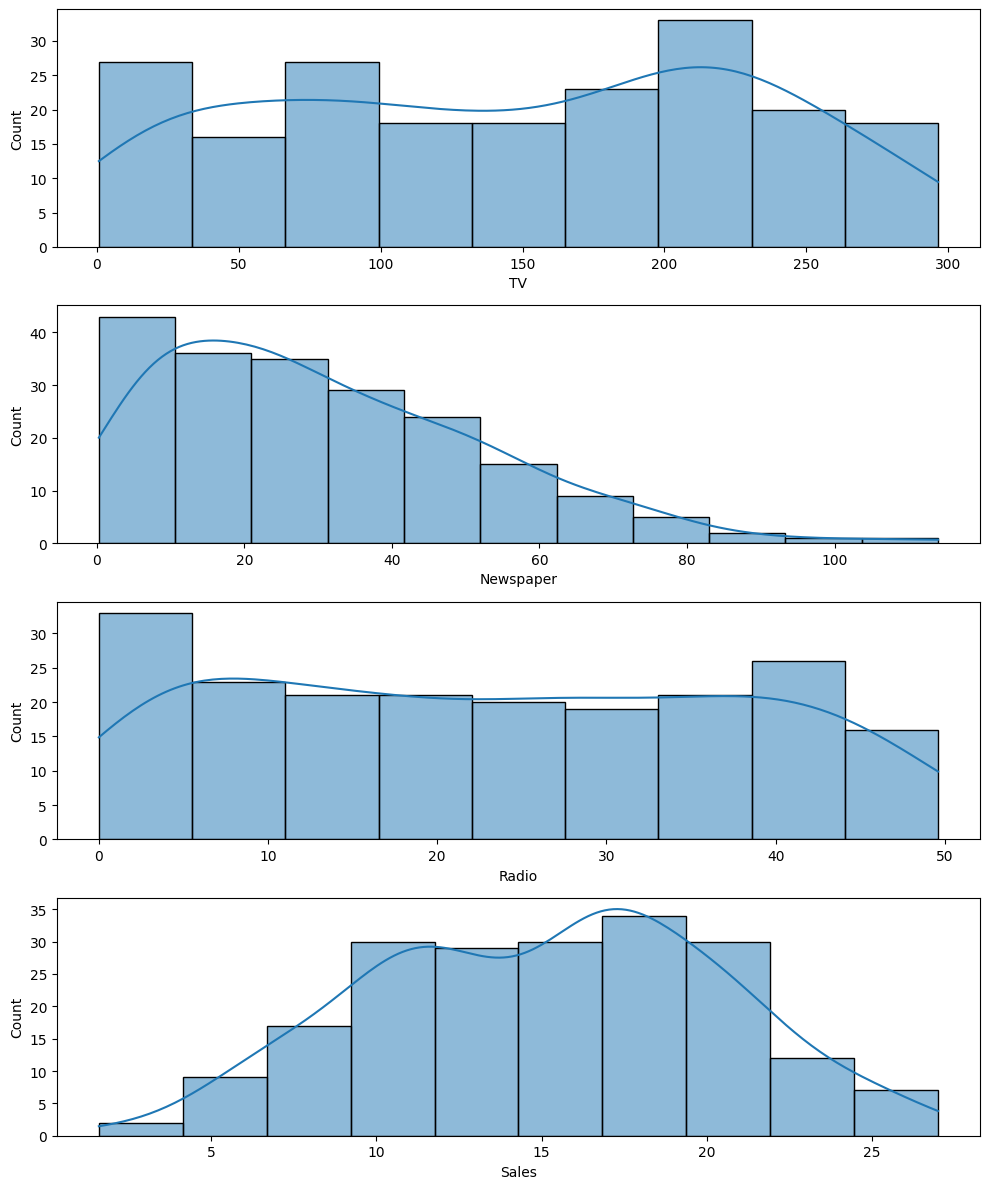

In [11]:
# Create subplots
my_fig, my_axes = plt.subplots(4, figsize=(10, 12))

# Create histograms for 'TV', 'Newspaper', and 'Radio' columns
sns.histplot(sales['TV'], ax=my_axes[0], kde=True)
sns.histplot(sales['Newspaper'], ax=my_axes[1], kde=True)
sns.histplot(sales['Radio'], ax=my_axes[2], kde=True)
sns.histplot(sales['Sales'], ax=my_axes[3], kde=True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


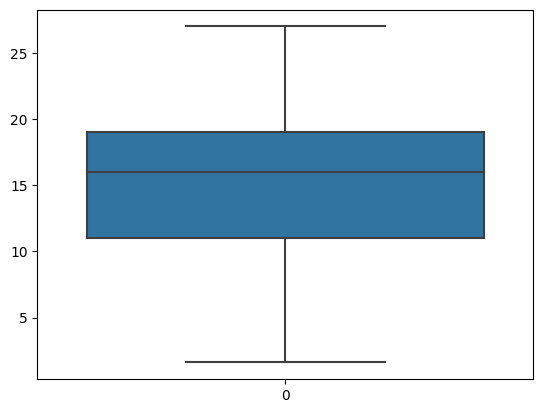

In [12]:
sns.boxplot(sales['Sales'])
plt.show()


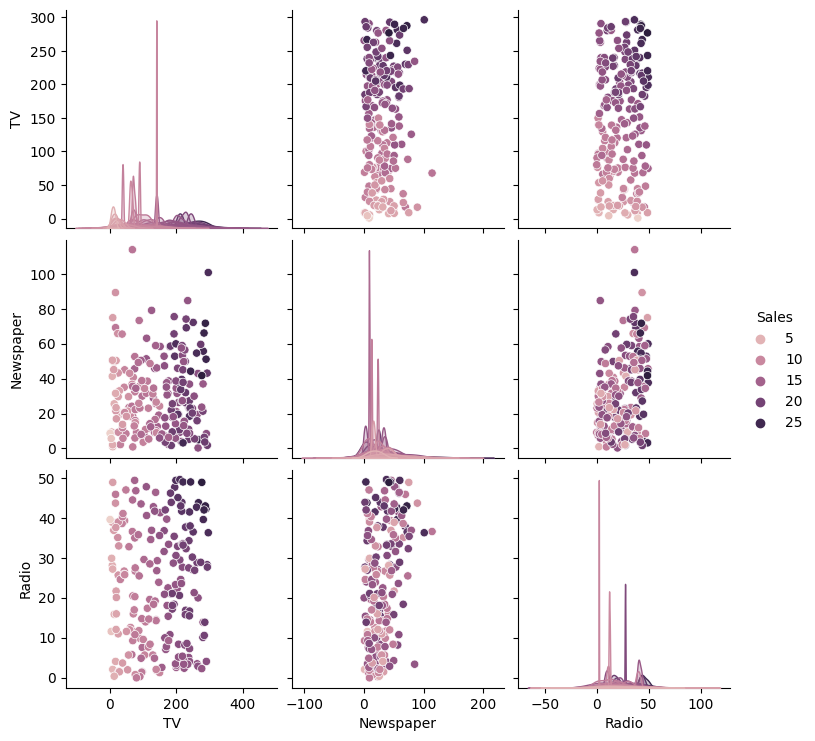

In [13]:
# Create a pairplot
pair_plot = sns.pairplot(sales, vars=['TV', 'Newspaper', 'Radio'], hue='Sales')

# Display the pairplot
plt.show()

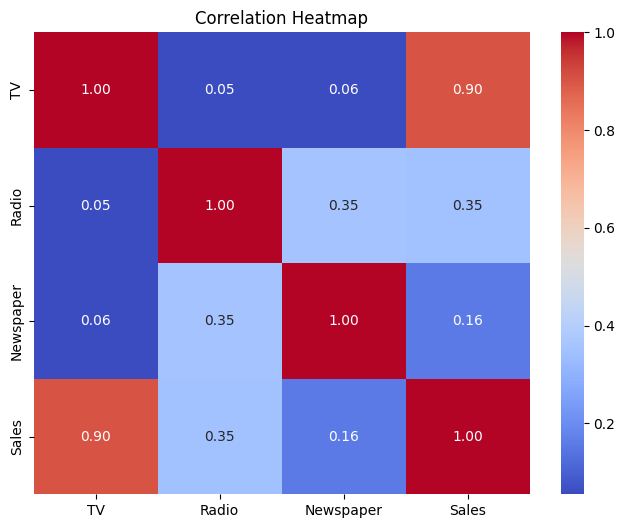

In [14]:
# Create a sample correlation matrix (you can replace this with your own data)
correlation_matrix = sales.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Add a title
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

###*Model Building*

In [15]:
# Define your feature variables (X) and target variable (y)
X = sales[['TV', 'Newspaper', 'Radio']]  # Features
y = sales['Sales']  # Target variable

In [16]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.head()

,TV,Newspaper,Radio
79,116.0,23.1,7.7
197,177.0,6.4,9.3
38,43.1,35.1,26.7
24,62.3,18.3,12.6
122,224.0,15.6,2.4


In [18]:
y_train.head()

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

In [19]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

###*Model Evaluation*

In [20]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error: 2.91
R-squared (R2): 0.91


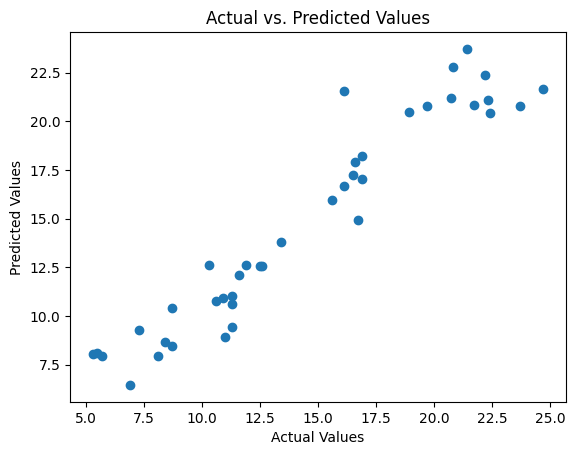

In [21]:
# Additional imports
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor  # Example of a different model

# Visualize predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()






In [22]:
# Perform k-fold cross-validation
cross_val_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean CV Score: {cross_val_scores.mean():.2f}")

# Feature Importance (if using a model that supports feature importance)
if isinstance(model, RandomForestRegressor):
    feature_importance = model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)
    print(importance_df)

Cross-Validation Scores: [0.87556263 0.93177791 0.92150403 0.84554586 0.90247132]
Mean CV Score: 0.90


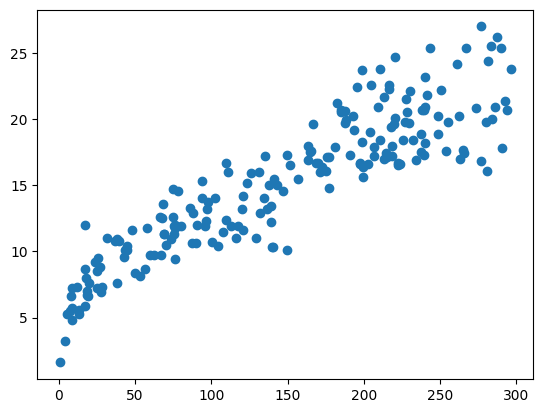

In [23]:
# Extract 'TV' feature from the DataFrame for X_test
X_test = sales['TV']

# Extract 'Sales' as the target values for y_test
y_test = sales['Sales']

# Now create the scatter plot
plt.scatter(X_test, y_test)
plt.show()



###*Conclusion*

**Objective:**The objective is to predict future sales, considering factors like advertising expenditure, target audience segmentation, and advertising platform selection.
Sales prediction is crucial for businesses, enabling them to optimize advertising strategies and maximize sales potential.

**Import Libraries:** Python offers a rich ecosystem of libraries for machine learning and data analysis.Commonly used libraries include pandas, numpy, matplotlib, seaborn, scikit-learn, and statsmodels.

**Loading Data:** Data loading is the initial step, often involving the import of datasets containing historical sales and related factors.
Data should be structured, cleaned, and prepared for analysis.

**Data Preprocessing:**Data preprocessing involves tasks like handling missing values, encoding categorical data, and scaling numerical features.
Clean data is essential for accurate model building.

**EDA (Exploratory Data Analysis):** EDA is critical for understanding the dataset and relationships between variables.
It includes tasks like data visualization, summary statistics, and identifying patterns.

**Correlation Matrix:** A correlation matrix helps quantify the relationships between variables.It's a valuable tool to identify which features are strongly correlated with the target variable (e.g., 'Sales').

**Model Building:** Model building includes selecting an appropriate algorithm (e.g., Linear Regression or Logistic Regression) for sales prediction.
The model is trained on historical data to capture relationships between features and sales.

**Logistic Regression:**Logistic Regression is a common choice when the target variable is categorical (e.g., binary classification).
It's suitable for predicting outcomes like customer purchases or no purchases.

**Model Evaluation:** Model evaluation is essential for assessing predictive performance.
Common metrics for regression tasks include Mean Squared Error (MSE) and R-squared (R2).
Classification models like Logistic Regression may use metrics like accuracy, precision, recall, and F1-score,Cross-Validation Scores,Mean CV Score.